<h1><center>NLP </center></h1>
<h2><center> Machine Learning </center></h2>

## Guideline:

- File to use: **contract_dataset_v20220109.csv**
- Train a **MULTI-CLASS CLASSIFICATION MODEL**. Your final model should be able to take in a test clause (column `provision`) and predict its provision type (column `label`). 
- Perform your own train-test split.
- Choose your own evaluation metrics and explain your choice(s).
- You may refer to, and/or copy code blocks from any public Github repositories, Kaggle kernels or tutorials online. However, please add a comment indicating the source.
- You are free to conduct exploratory data analysis, write unit tests or any other additional steps as you find neccesary.
- The purpose is NOT to train the best-performing model. It is to help us assess your ability to learn and apply NLP modelling techniques.

In [30]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.layers import Input , Dense , Conv2D , MaxPooling2D , UpSampling2D
from tensorflow.keras.models import Sequential
from matplotlib.pyplot import imshow
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns


from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from nltk.corpus import stopwords

import matplotlib.pyplot as plt






#### Reading the data

In [31]:
df = pd.read_csv('contract_dataset_v20220109.csv')

In [144]:
df.head()

,provision,label,source,Contract_Dates,Passwords
0,Borrower and any endorsers or guarantors hereo...,['waivers'],2019/QTR1/000143774919001296/ex_133310.htm,Offer Expiration Date: 6/30/2025,0HT@a@z)jz%
1,"No failure to exercise, and no delay in exerci...",['waivers'],2019/QTR1/000149315219002427/ex10-1.htm,Offer Expiration Date: 7/5/2023,v&-TAdyt
2,Until the Discharge of Senior Lender Claims ha...,['waivers'],2019/QTR1/000114420419010508/tv513897_ex10-25.htm,Contract Start Date: 1 27 2024,ijwepC|Y:Og
3,Neither Party shall be deemed to have waived a...,['waivers'],2019/QTR1/000148881319000009/a1022cobaltagreem...,Offer Expiration Date: 9/2/2023,sYJA +T#t
4,No waiver of the provisions hereof shall be va...,['waivers'],2019/QTR1/000114420419011984/tv514470_ex10-15.htm,Contract Start Date: 4 august 2021,9~$z3TJ0N|F!Oep


#### Data cleaning

In [146]:
df = df.drop_duplicates()
label = df['label']
provision = df['provision']

In [148]:
label.value_counts() #Checking to see the distribution of data


['governing laws']            12522
['counterparts']               9256
['amendments']                 4795
['terminations']               3748
['waivers']                    3274
['warranties']                  607
['valid issuances']             129
['government regulations']      127
['trade relations']              53
['trading activities']           38
Name: label, dtype: int64

provision         0
label             0
source            0
Contract_Dates    0
Passwords         0
dtype: int64

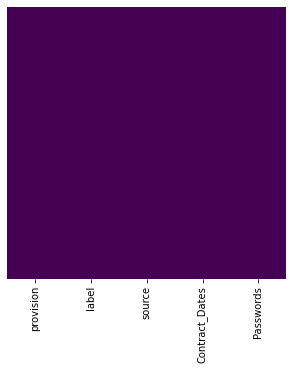

In [35]:

fig, ax = plt.subplots(figsize=(5,5))   
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
df.isna().sum()
#There doesn't seem to be any null values


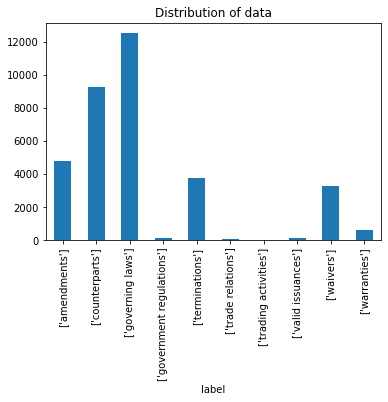

In [143]:
# Distribution of data for the different labels
maindata = df[['provision','label']]
ax = maindata.groupby('label').count().plot(kind='bar', title='Distribution of data', legend=False)


In [37]:
maindata["provision_cleaned"] = maindata["provision"].str.lower()
maindata["provision_cleaned"] = maindata["provision_cleaned"].str.replace('[^\w\s]', '')
## Lowercase and remove unnwanted strings.


C:\Users\HARISH~1\AppData\Local\Temp/ipykernel_16452/2053982368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata["provision_cleaned"] = maindata["provision"].str.lower()
C:\Users\HARISH~1\AppData\Local\Temp/ipykernel_16452/2053982368.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  maindata["provision_cleaned"] = maindata["provision_cleaned"].str.replace('[^\w\s]', '')
C:\Users\HARISH~1\AppData\Local\Temp/ipykernel_16452/2053982368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [38]:
maindata

,provision,label,provision_cleaned
0,Borrower and any endorsers or guarantors hereo...,['waivers'],borrower and any endorsers or guarantors hereo...
1,"No failure to exercise, and no delay in exerci...",['waivers'],no failure to exercise and no delay in exercis...
2,Until the Discharge of Senior Lender Claims ha...,['waivers'],until the discharge of senior lender claims ha...
3,Neither Party shall be deemed to have waived a...,['waivers'],neither party shall be deemed to have waived a...
4,No waiver of the provisions hereof shall be va...,['waivers'],no waiver of the provisions hereof shall be va...
...,...,...,...
34544,The Buyer's trading activities with respect to...,['trading activities'],the buyers trading activities with respect to ...
34545,Neither the Buyer nor its affiliates has an op...,['trading activities'],neither the buyer nor its affiliates has an op...
34546,Neither the Holder nor its affiliates has an o...,['trading activities'],neither the holder nor its affiliates has an o...
34547,Neither the Holder nor its affiliates has an o...,['trading activities'],neither the holder nor its affiliates has an o...


In [39]:
stop_words = set(stopwords.words('english'))
maindata['provision_cleaned'] = maindata['provision_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


C:\Users\HARISH~1\AppData\Local\Temp/ipykernel_16452/2106833244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata['provision_cleaned'] = maindata['provision_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [40]:
label_map = {
    
    '[\'governing laws\']': 1,
    '[\'counterparts\']': 2,    
    '[\'amendments\']' : 3,                 
    '[\'terminations\']' : 4,              
    '[\'waivers\']': 5,                    
    '[\'warranties\']': 6,                  
    '[\'valid issuances\']': 7,             
    '[\'government regulations\']': 8,      
    '[\'trade relations\']': 9,         
    '[\'trading activities\']': 0,  
    
    
}

In [41]:
maindata['label_vectors'] = maindata['label'].map(label_map)

C:\Users\HARISH~1\AppData\Local\Temp/ipykernel_16452/986292357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata['label_vectors'] = maindata['label'].map(label_map)


In [42]:
maindata 
#Sanity check

,provision,label,provision_cleaned,label_vectors
0,Borrower and any endorsers or guarantors hereo...,['waivers'],borrower endorsers guarantors hereof severally...,5
1,"No failure to exercise, and no delay in exerci...",['waivers'],failure exercise delay exercising part holder ...,5
2,Until the Discharge of Senior Lender Claims ha...,['waivers'],discharge senior lender claims occurred second...,5
3,Neither Party shall be deemed to have waived a...,['waivers'],neither party shall deemed waived rights power...,5
4,No waiver of the provisions hereof shall be va...,['waivers'],waiver provisions hereof shall valid unless wr...,5
...,...,...,...,...
34544,The Buyer's trading activities with respect to...,['trading activities'],buyers trading activities respect companys com...,0
34545,Neither the Buyer nor its affiliates has an op...,['trading activities'],neither buyer affiliates open short position h...,0
34546,Neither the Holder nor its affiliates has an o...,['trading activities'],neither holder affiliates open short position ...,0
34547,Neither the Holder nor its affiliates has an o...,['trading activities'],neither holder affiliates open short position ...,0


In [43]:
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


dfp = df['provision']
counter = counter_word(dfp)

In [45]:
num_unique_words = len(counter)

X

#### Building model

In [129]:
from tensorflow.keras.optimizers import SGD

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding 

model = Sequential()


# Embedding layer
model.add(
    Embedding(input_dim=num_unique_words,
              input_length = 20,
              output_dim=100,
              mask_zero=True))

# Masking layer for pre-trained embeddings

# Recurrent layer
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [130]:
model.build()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 100)           2457000   
                                                                 
 lstm_4 (LSTM)               (None, 64)                42240     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 2,504,050
Trainable params: 2,504,050
Non-trainable params: 0
_________________________________________________________________


In [131]:
test_data = maindata.sample(frac = 0.5)
train_data = maindata.drop(test_data.index)

# Creating dataframe split into 50-50


In [132]:
# Split dataset into training and validation set

import numpy as np

train_sentences = train_data['provision_cleaned'].to_numpy()
train_labels = train_data['label_vectors'].to_numpy()
val_sentences = test_data['provision_cleaned'].to_numpy()
val_labels = test_data['label_vectors'].to_numpy()

In [133]:
# Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences) # fit only to traini

In [134]:

train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)

In [135]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length = 20

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding="post", truncating="post")
train_padded.shape, val_padded.shape

((17275, 20), (17274, 20))

In [136]:
history = model.fit(
        train_padded, train_labels, verbose=2,
        steps_per_epoch= 500 // 50,
        epochs=15,
        validation_data=(val_padded,val_labels),
        validation_steps=75 // 30,
        shuffle = True) 


Epoch 1/15
10/10 - 17s - loss: 2.2408 - accuracy: 0.4903 - val_loss: 2.1172 - val_accuracy: 0.6314 - 17s/epoch - 2s/step
Epoch 2/15
10/10 - 9s - loss: 1.8201 - accuracy: 0.5792 - val_loss: 1.2783 - val_accuracy: 0.6254 - 9s/epoch - 933ms/step
Epoch 3/15
10/10 - 9s - loss: 1.1189 - accuracy: 0.6162 - val_loss: 0.8431 - val_accuracy: 0.6370 - 9s/epoch - 922ms/step
Epoch 4/15
10/10 - 9s - loss: 0.8146 - accuracy: 0.6992 - val_loss: 0.6975 - val_accuracy: 0.7466 - 9s/epoch - 926ms/step
Epoch 5/15
10/10 - 9s - loss: 0.6405 - accuracy: 0.7646 - val_loss: 0.5283 - val_accuracy: 0.8244 - 9s/epoch - 941ms/step
Epoch 6/15
10/10 - 9s - loss: 0.5135 - accuracy: 0.7835 - val_loss: 0.4398 - val_accuracy: 0.8569 - 9s/epoch - 921ms/step
Epoch 7/15
10/10 - 9s - loss: 0.4052 - accuracy: 0.8368 - val_loss: 0.3207 - val_accuracy: 0.9000 - 9s/epoch - 936ms/step
Epoch 8/15
10/10 - 9s - loss: 0.2886 - accuracy: 0.9001 - val_loss: 0.2281 - val_accuracy: 0.9311 - 9s/epoch - 892ms/step
Epoch 9/15
10/10 - 9s - l

#### Model evaluation

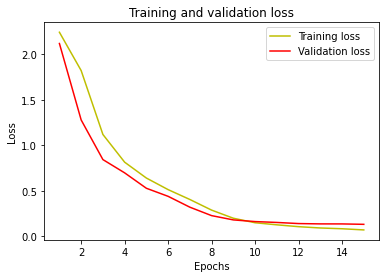

In [137]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets


### If we talk about classification problems, the most common metrics used are:

- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)

#### We can use a classification report to look at all the above mentioned metrics
##### A confusion matrix can also help identify which labels have issues and where the model becomes confused while making predictions.
#### A good matrix (model) will have large values across the diagonal and small values off the diagonal.
#### Measuring a confusion matrix provides better insight in particulars of is our classification model is getting correct and what types of errors it is creating.


In [150]:
def decode_prediction(prediction,decoded_prediction): #function to decode predcitions from our model
    for item in prediction :
        value = (np.array(item).argmax())
        probability = np.max(item)
        decoded_prediction.append(value)
        print (list(label_map.keys())[list(label_map.values()).index(value)])
        print ("Accuracy of prediction is {:.2f} %". format(probability*100))

In [151]:
prediction_list = []
y_predict = model.predict(val_padded)

In [ ]:
decode_prediction(y_predict,prediction_list)

In [153]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(prediction_list, test_data['label_vectors'])


In [154]:
print("Test Accuracy : {}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report : ")
print(classification_report(test_data['label_vectors'], prediction_list))
print("\nConfusion Matrix : ")
print(confusion_matrix(test_data['label_vectors'], prediction_list))

Test Accuracy : 0.9736613603473228

Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       1.00      0.99      0.99      6211
           2       1.00      1.00      1.00      4621
           3       0.94      0.96      0.95      2397
           4       0.92      0.96      0.94      1858
           5       0.95      0.94      0.95      1690
           6       0.63      0.83      0.72       319
           7       0.00      0.00      0.00        65
           8       0.00      0.00      0.00        72
           9       0.00      0.00      0.00        26

    accuracy                           0.97     17274
   macro avg       0.54      0.57      0.55     17274
weighted avg       0.96      0.97      0.96     17274


Confusion Matrix : 
[[   0    3    0    0    0    0   12    0    0    0]
 [   0 6166    1   36    1    7    0    0    0    0]
 [   0    3 4601   13    0    4    0    0    0    0]


C:\Users\Harish Vasanth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harish Vasanth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harish Vasanth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### It seems as though our model has a very high overall accuracy but a very low accuracy when it comes to some label classes. Looking at this might suggest that using a simpler model such as Naive Bayes might have beeen more effective.Simpler models are usually more suited for smaller datas with bias such as our data.
#### We have a high precision and high recall, that means a high amount of true positives.
#### Overall, our model is flawed but is also highly effective & accurate. 

In [66]:
#save the model to disk
#import pickle

#filename = 'label_model.pkl'
#pickle_out = open(filename, 'wb')
#pickle.dump(model, pickle_out )


#### Pipeline to make a simple prediction based on our model
 


In [140]:
def prediction(list): ## pipeline to run our model on a list of sentences to get the appropriate predictions.
    tokenized_list = tokenizer.texts_to_sequences(list)
    max_length = 20
    list_padded = pad_sequences(tokenized_list, maxlen=max_length, padding="post", truncating="post")
    undecoded_prediction = model.predict(list_padded)
    prediction_list = []
    decode_prediction(undecoded_prediction,prediction_list)
    
    
    
    
    

In [141]:
test = ['This Agreement will terminate when the Issuer is terminated under the Trust Agreement.']

In [142]:
prediction(test) # this is correct !!! 

['terminations']
Accuracy of prediction is 83.95 %


# References

#### 1. Data cleaning for NLP -  https://www.analyticsvidhya.com/blog/2022/01/text-cleaning-methods-in-nlp/
#### 2. Understanding how reccurent neural networks work - https://www.youtube.com/watch?v=ySEx_Bqxvvo&t=2186s
#### 3. Loss functions & optimisation - https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
